In [1]:
import numpy as np 
import matplotlib.pyplot as plt  
import json

In [7]:
test_accs_all5 = []
train_accs_all5 = []
ckpts5 = [int(_) for _ in ["416","833", "1250", "1666", "2080"]]
for ckpt in ckpts5:
    test_accs = (np.load("../ckpts/math_aug3_unmemorized_geq_3_total10000_epochs5/checkpoint-"+str(ckpt)+ "/test_answer_types5_seed2.npy")==0)
    train_accs = (np.load("../ckpts/math_aug3_unmemorized_geq_3_total10000_epochs5/checkpoint-"+str(ckpt)+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    # test_accs_all.append(test_accs.mean())
    test_accs_all5.append(test_accs.mean())
    train_accs_all5.append(train_accs.mean())


test_accs_all5 = np.array(test_accs_all5)
train_accs_all5 = np.array(train_accs_all5)

0.06352
0.1028
0.13896
0.1588
0.16528


In [8]:
test_accs_all10 = []
train_accs_all10 = []
ckpts10 = [int(_) for _ in ["832", "1664", "2496", "3328", "4160", ]]
for ckpt in ckpts10:
    test_accs = (np.load("../ckpts/math_aug3_unmemorized_geq_3_total10000_epochs10/checkpoint-"+str(ckpt)+ "/test_answer_types5_seed2.npy")==0)
    train_accs = (np.load("../ckpts/math_aug3_unmemorized_geq_3_total10000_epochs10/checkpoint-"+str(ckpt)+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    # test_accs_all.append(test_accs.mean())
    test_accs_all10.append(test_accs.mean())
    train_accs_all10.append(train_accs.mean())


test_accs_all10 = np.array(test_accs_all10)
train_accs_all10 = np.array(train_accs_all10)

0.08816
0.10916
0.13024
0.1414
0.1498


In [9]:
test_accs_all20 = []
train_accs_all20 = []   
ckpts20 = [int(_) for _ in ["832", "1664", "2496", "3328", "4160", "4992", "5824", "6656", "7488", "8320"]]
for ckpt in ckpts20:
    test_accs = (np.load("../ckpts/math_aug3_unmemorized_geq_3_total10000_epochs20/checkpoint-"+str(ckpt)+ "/test_answer_types5_seed2.npy")==0)
    train_accs = (np.load("../ckpts/math_aug3_unmemorized_geq_3_total10000_epochs20/checkpoint-"+str(ckpt)+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    # test_accs_all.append(test_accs.mean())
    test_accs_all20.append(test_accs.mean())
    train_accs_all20.append(train_accs.mean())


test_accs_all20 = np.array(test_accs_all20)
train_accs_all20 = np.array(train_accs_all20)

0.08264
0.09896
0.09568
0.10672
0.10888
0.1192
0.1268
0.12468
0.13052
0.13152


Text(0.5, 1.0, 'MATH (unmemorized>=3, 10000 expls)')

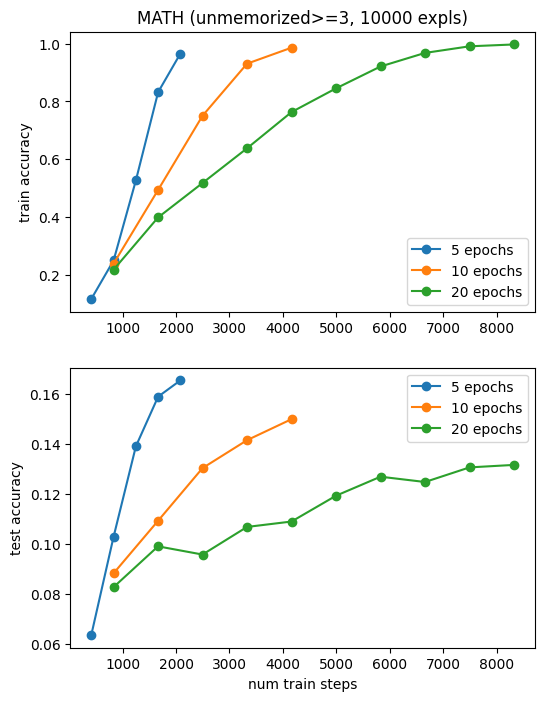

In [10]:

# make 2 subplots vertically stacked
fig, ax = plt.subplots(2, 1, figsize=(6, 8))


ax[0].plot(ckpts5, train_accs_all5, "o-", label="5 epochs")
ax[0].plot(ckpts10, train_accs_all10, "o-",label="10 epochs")
ax[0].plot(ckpts20, train_accs_all20,"o-", label="20 epochs")

ax[0].legend()

ax[0].set_ylabel("train accuracy")

ax[1].plot(ckpts5, test_accs_all5, "o-", label="5 epochs")
ax[1].plot(ckpts10, test_accs_all10, "o-",label="10 epochs")
ax[1].plot(ckpts20, test_accs_all20,"o-", label="20 epochs")

ax[1].legend()

ax[1].set_xlabel("num train steps")
ax[1].set_ylabel("test accuracy")

ax[0].set_title("MATH (unmemorized>=3, 10000 expls)")

In [11]:
with open('../data/MATH_aug/AugMATH_part1.jsonl', 'r') as json_file:
    json_list = list(json_file)

with open('../data/MATH_aug/AugMATH_part2.jsonl', 'r') as json_file:
    json_list += list(json_file)

train_questions = []
train_answers = []
for json_str in json_list:
    result = json.loads(json_str)
    train_questions.append(result["query"])
    train_answers.append(result["response"])
    
train_questions = np.array(train_questions)
train_answers = np.array(train_answers)

In [12]:
num_memorized_all5 = []
num_correct_different_all5 = []
num_incorrect_all5 = []


subsample_idxs5 = np.load("../ckpts/math_aug3_unmemorized_geq_3_total10000_epochs5/subsample_idxs.npy")

# ckpts = ["832", "1664", "2496", "3328", "4160", "4992", "5824", "6656", "7488", "8320"]
ckpts5 = [int(_) for _ in ["416","833", "1250", "1666", "2080"]]
# ckpts = ["3332", "6664", "9996", "13328", "16660"]

for ckpt in ckpts5:
    # train_correct = (np.load("ckpts/math_aug3_unmemorized_geq_3_total10000_epochs20/checkpoint-"+ckpt+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    # train_samples = (np.load("ckpts/math_aug3_unmemorized_geq_3_total10000_epochs20/checkpoint-"+ckpt+ "/train_aug_subsample_answers5_seed2.npy"))
    train_correct = (np.load("../ckpts/math_aug3_unmemorized_geq_3_total10000_epochs5/checkpoint-"+str(ckpt)+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    train_samples = (np.load("../ckpts/math_aug3_unmemorized_geq_3_total10000_epochs5/checkpoint-"+str(ckpt)+ "/train_aug_subsample_answers5_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs5[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all5.append(num_memorized_ckpt)
    num_correct_different_all5.append(num_correct_different_ckpt)
    num_incorrect_all5.append(num_incorrect_ckpt)
    
num_memorized_all5 = np.array(num_memorized_all5)
num_correct_different_all5 = np.array(num_correct_different_all5)
num_incorrect_all5 = np.array(num_incorrect_all5)

In [13]:
num_memorized_all10 = []
num_correct_different_all10 = []
num_incorrect_all10 = []

subsample_idxs10 = np.load("../ckpts/math_aug3_unmemorized_geq_3_total10000_epochs10/subsample_idxs.npy")

ckpts10 = [int(_) for _ in ["832", "1664", "2496", "3328", "4160", ]]

for ckpt in ckpts10:
    # train_correct = (np.load("ckpts/math_aug3_unmemorized_geq_3_total10000_epochs20/checkpoint-"+ckpt+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    # train_samples = (np.load("ckpts/math_aug3_unmemorized_geq_3_total10000_epochs20/checkpoint-"+ckpt+ "/train_aug_subsample_answers5_seed2.npy"))
    train_correct = (np.load("../ckpts/math_aug3_unmemorized_geq_3_total10000_epochs10/checkpoint-"+str(ckpt)+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    train_samples = (np.load("../ckpts/math_aug3_unmemorized_geq_3_total10000_epochs10/checkpoint-"+str(ckpt)+ "/train_aug_subsample_answers5_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs10[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all10.append(num_memorized_ckpt)
    num_correct_different_all10.append(num_correct_different_ckpt)
    num_incorrect_all10.append(num_incorrect_ckpt)

num_memorized_all10 = np.array(num_memorized_all10)
num_correct_different_all10 = np.array(num_correct_different_all10)
num_incorrect_all10 = np.array(num_incorrect_all10)

In [14]:
num_memorized_all20 = []
num_correct_different_all20 = []
num_incorrect_all20 = []

subsample_idxs20 = np.load("../ckpts/math_aug3_unmemorized_geq_3_total10000_epochs20/subsample_idxs.npy")

ckpts20 = [int(_) for _ in ["832", "1664", "2496", "3328", "4160", "4992", "5824", "6656", "7488", "8320"]]

for ckpt in ckpts20:
    train_correct = (np.load("../ckpts/math_aug3_unmemorized_geq_3_total10000_epochs20/checkpoint-"+str(ckpt)+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    train_samples = (np.load("../ckpts/math_aug3_unmemorized_geq_3_total10000_epochs20/checkpoint-"+str(ckpt)+ "/train_aug_subsample_answers5_seed2.npy"))
    
    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []
    
    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs20[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
        
    num_memorized_all20.append(num_memorized_ckpt)
    num_correct_different_all20.append(num_correct_different_ckpt)
    num_incorrect_all20.append(num_incorrect_ckpt)
    
num_memorized_all20 = np.array(num_memorized_all20)
num_correct_different_all20 = np.array(num_correct_different_all20)
num_incorrect_all20 = np.array(num_incorrect_all20)

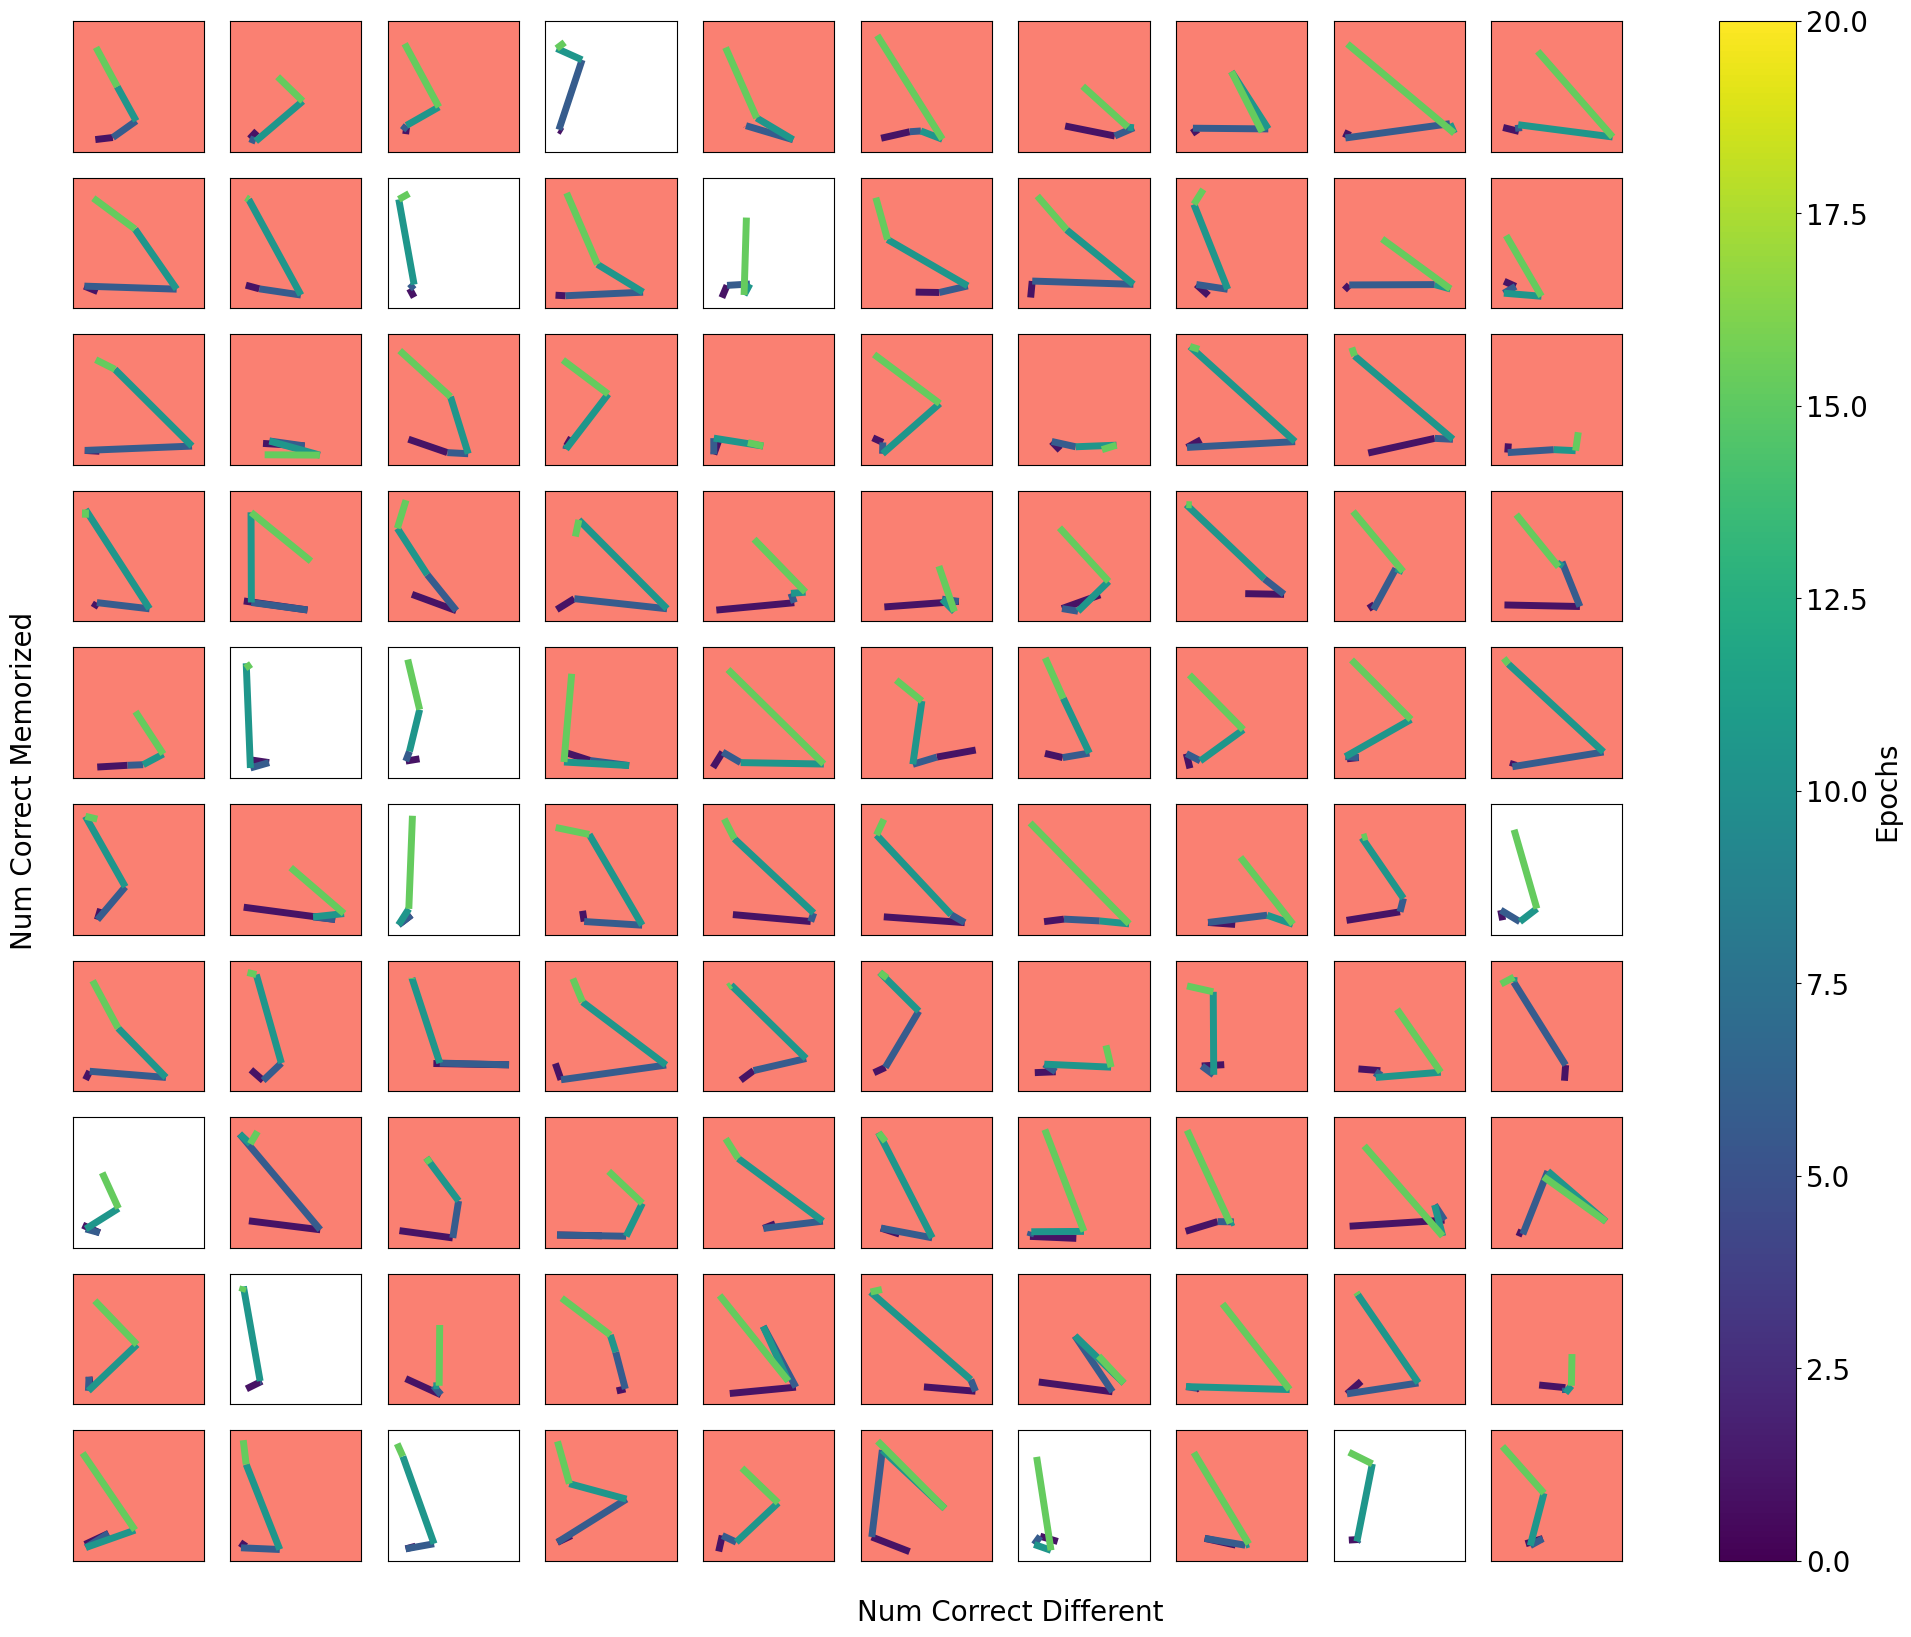

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap

num_ckpts = len(num_correct_different_all5)

# Create a gradient color map
cmap = plt.get_cmap('viridis')
# Create the plot
fig, ax = plt.subplots(10, 10, figsize=(25, 20))

# Create an array of values to use for coloring each segment
color_values = np.linspace(1, 20, num_ckpts)




for i in range(100):
    x = num_correct_different_all5[:, i]+np.random.uniform(-0.5, 0.5, num_ckpts)
    y = num_memorized_all5[:, i]+np.random.uniform(-0.5, 0.5, num_ckpts)
    # Create line segments
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a LineCollection from the segments
    lc = LineCollection(segments, cmap=cmap, norm=plt.Normalize(0, 20), alpha=1)
    lc.set_array(color_values)
    lc.set_linewidth(5)


    ax[i//10][i%10].add_collection(lc)
    ax[i//10][i%10].autoscale()
    ax[i//10][i%10].set_xlim(-1, 6)
    ax[i//10][i%10].set_ylim(-1, 6)
    ax[i//10][i%10].set_yticks([])
    ax[i//10][i%10].set_xticks([])
    
    if max(x)>1.5:
        ax[i//10][i%10].set_facecolor('salmon')

# # Plot markers at the start of each segment
# ax.plot(x, y, 'o', color='black')

# Add a colorbar
cbar = plt.colorbar(lc, ax=ax)
cbar.ax.tick_params(labelsize=20) 

cbar.set_label('Epochs', fontsize=20)

# add x label to entire plot

fig.text(0.5, 0.08, 'Num Correct Different', ha='center', fontsize=20)
fig.text(0.1, 0.5, 'Num Correct Memorized', va='center', rotation='vertical', fontsize=20)

plt.savefig("delete.png")

Text(0.5, 1.0, 'MATH (10000 train expls) 20 epochs')

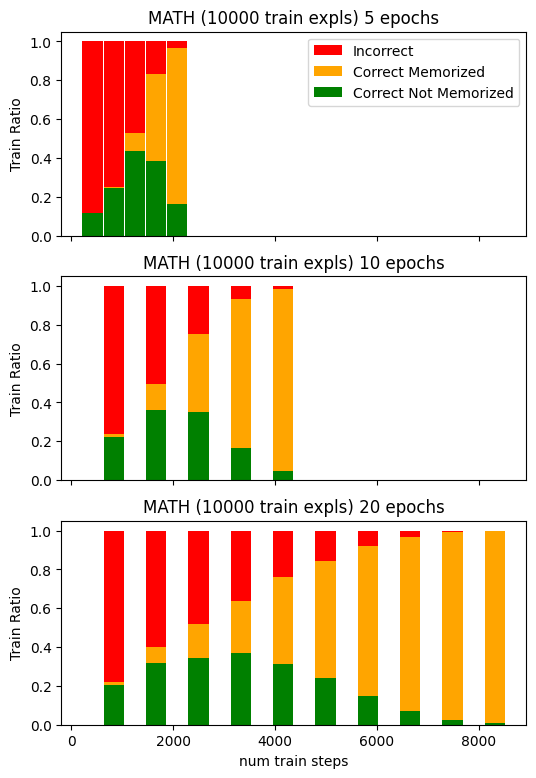

In [51]:
bar_width = 400

num_ckpts = len(ckpts5)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 9), sharex=True, sharey=True)
ax1.bar(ckpts5, [1 for i in range(num_ckpts)], color = "red", label = "Incorrect", width=bar_width)
ax1.bar(ckpts5, [1-(num_incorrect_all5/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized", width=bar_width)
ax1.bar(ckpts5, [1-(num_incorrect_all5/5).mean(axis=1)[i]-(num_memorized_all5/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized", width=bar_width)
# ax1.set_xticks([2*i for i in range(1, num_ckpts+1)])
ax1.set_ylabel("Train Ratio")
ax1.set_title("MATH (10000 train expls) 5 epochs")
ax1.legend()

num_ckpts = len(ckpts10)
ax2.bar(ckpts10, [1 for i in range(num_ckpts)], color = "red", label = "Incorrect", width=bar_width)
ax2.bar(ckpts10, [1-(num_incorrect_all10/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized", width=bar_width)
ax2.bar(ckpts10, [1-(num_incorrect_all10/5).mean(axis=1)[i]-(num_memorized_all10/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized", width=bar_width)

ax2.set_ylabel("Train Ratio")
ax2.set_title("MATH (10000 train expls) 10 epochs")

num_ckpts = len(ckpts20)
ax3.bar(ckpts20, [1 for i in range(num_ckpts)], color = "red", label = "Incorrect", width=bar_width)
ax3.bar(ckpts20, [1-(num_incorrect_all20/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized", width=bar_width)
ax3.bar(ckpts20, [1-(num_incorrect_all20/5).mean(axis=1)[i]-(num_memorized_all20/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized", width=bar_width)

ax3.set_xlabel("num train steps")
ax3.set_ylabel("Train Ratio")
ax3.set_title("MATH (10000 train expls) 20 epochs")





In [71]:
cummulative_num_correct_different5 = []
cummulative_num_memorized5 = []

num_different_threshold = 4
num_memorized_threshold = 4
for i in range(len(num_correct_different_all5)):
    # cummulative_num_correct_different5.append((num_correct_different_all5[:i+1].max(axis=0)>=1).sum())
    # cummulative_num_correct_different5.append((num_correct_different_all5[:i+1].max(axis=0)>=4).sum())
    cummulative_num_correct_different5.append((num_correct_different_all5[:i+1].max(axis=0)>=num_different_threshold).sum())
    
    cummulative_num_memorized5_i = ((num_correct_different_all5[:i+1].max(axis=0)<num_different_threshold)*(num_memorized_all5[:i+1].max(axis=0)>=num_memorized_threshold)).sum()
    # cummulative_num_memorized5_i = num_memorized_all5[i].mean()/5
    cummulative_num_memorized5.append(cummulative_num_memorized5_i)

cummulative_num_memorized5 = np.array(cummulative_num_memorized5)
cummulative_num_correct_different5 = np.array(cummulative_num_correct_different5)



cummulative_num_correct_different10 = []
cummulative_num_memorized10 = []
for i in range(len(num_correct_different_all10)):
    # cummulative_num_correct_different10.append((num_correct_different_all10[:i+1].max(axis=0)>=3).sum())
    cummulative_num_correct_different10.append((num_correct_different_all10[:i+1].max(axis=0)>=num_different_threshold).sum())
    
    cummulative_num_memorized10_i = ((num_correct_different_all10[:i+1].max(axis=0)<num_different_threshold)*(num_memorized_all10[:i+1].max(axis=0)>=num_memorized_threshold)).sum()
    # cummulative_num_memorized10_i = num_memorized_all10[i].mean()/5
    cummulative_num_memorized10.append(cummulative_num_memorized10_i)

cummulative_num_memorized10 = np.array(cummulative_num_memorized10)
cummulative_num_correct_different10 = np.array(cummulative_num_correct_different10)

num_correct_different_all20_2 = num_correct_different_all20[[1, 3, 4, 5, 9]]
num_memorized_all20_2 = num_memorized_all20[[1, 3, 4, 5, 9]]



cummulative_num_correct_different20 = []
cummulative_num_memorized20 = []
for i in range(len(num_correct_different_all20_2)):
    # cummulative_num_correct_different20.append((num_correct_different_all20[:i+1].max(axis=0)>=3).sum())
    cummulative_num_correct_different20.append((num_correct_different_all20_2[:i+1].max(axis=0)>=num_different_threshold).sum())
    
    
    cummulative_num_memorized20_i = ((num_correct_different_all20_2[:i+1].max(axis=0)<num_different_threshold)*(num_memorized_all20_2[:i+1].max(axis=0)>=num_memorized_threshold)).sum()
    # cummulative_num_memorized20_i = num_memorized_different_all20_2[i].mean()/5
    cummulative_num_memorized20.append(cummulative_num_memorized20_i)

cummulative_num_memorized20 = np.array(cummulative_num_memorized20)
cummulative_num_correct_different20 = np.array(cummulative_num_correct_different20)



Text(0.5, 1.0, 'MATH (10000 train expls)')

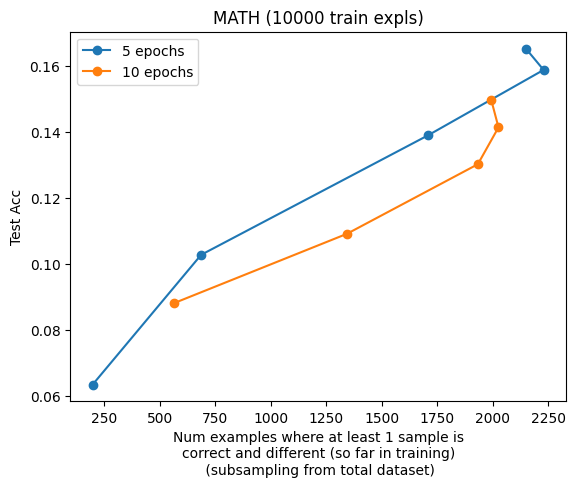

In [75]:

plt.plot(cummulative_num_correct_different5-0.2*cummulative_num_memorized5, test_accs_all5, "o-", label = "5 epochs")

plt.plot(cummulative_num_correct_different10-0.2*cummulative_num_memorized10, test_accs_all10, "o-", label = "10 epochs")

# plt.plot(cummulative_num_correct_different20-cummulative_num_memorized20, test_accs_all20[[1, 3, 4, 5, 9]], "o-", label = "20 epochs")


# plt.axvline(5000, color = "red", label = "subsampling train set size")
plt.legend()


plt.xlabel("Num examples where at least 1 sample is\ncorrect and different (so far in training)\n (subsampling from total dataset)")
plt.ylabel("Test Acc")
plt.title("MATH (10000 train expls)")


Text(0.5, 1.0, 'MATH (10000 train expls)')

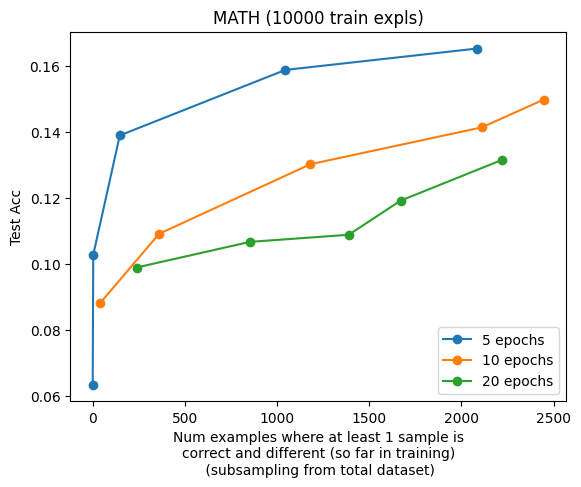

In [73]:

plt.plot(cummulative_num_memorized5, test_accs_all5, "o-", label = "5 epochs")

plt.plot(cummulative_num_memorized10, test_accs_all10, "o-", label = "10 epochs")

plt.plot(cummulative_num_memorized20, test_accs_all20[[1, 3, 4, 5, 9]], "o-", label = "20 epochs")


# plt.axvline(5000, color = "red", label = "subsampling train set size")
plt.legend()


plt.xlabel("Num examples where at least 1 sample is\ncorrect and different (so far in training)\n (subsampling from total dataset)")
plt.ylabel("Test Acc")
plt.title("MATH (10000 train expls)")

In [55]:
num_correct_different_all20_2.shape

(5, 5000)

Text(0.5, 1.0, 'MATH (10000 train expls)')

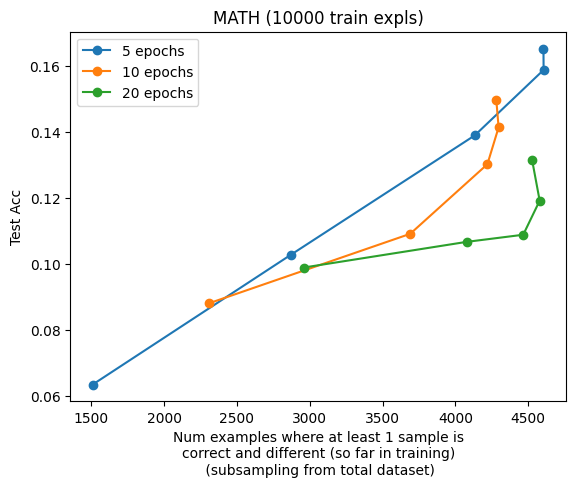

In [38]:

plt.plot(cummulative_num_correct_different5 - cummulative_num_memorized5, test_accs_all5, "o-", label = "5 epochs")

plt.plot(cummulative_num_correct_different10 - cummulative_num_memorized10, test_accs_all10, "o-", label = "10 epochs")

plt.plot(cummulative_num_correct_different20 - cummulative_num_memorized20, test_accs_all20[[1, 3, 4, 5, 9]], "o-", label = "20 epochs")


# plt.axvline(5000, color = "red", label = "subsampling train set size")
plt.legend()


plt.xlabel("Num examples where at least 1 sample is\ncorrect and different (so far in training)\n (subsampling from total dataset)")
plt.ylabel("Test Acc")
plt.title("MATH (10000 train expls)")


In [97]:
(num_correct_different_all5.sum(axis=0)).sum()

33653

In [98]:
(num_correct_different_all10.sum(axis=0)).sum()

28628

In [100]:
(num_correct_different_all20[[1, 3, 5, 6, 9]].sum(axis=0)).sum()

27058

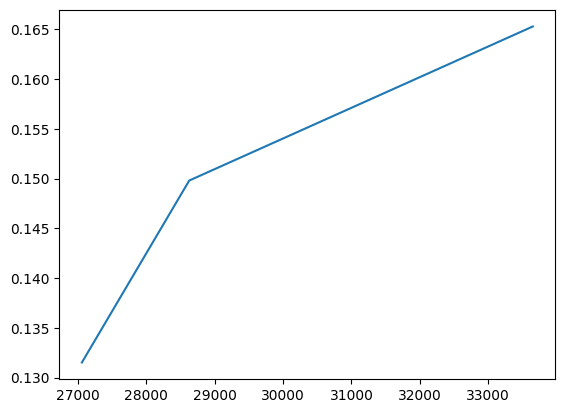

In [102]:
plt.plot([27058, 28628, 33653], [test_accs_all20[-1], test_accs_all10[-1], test_accs_all5[-1]])

